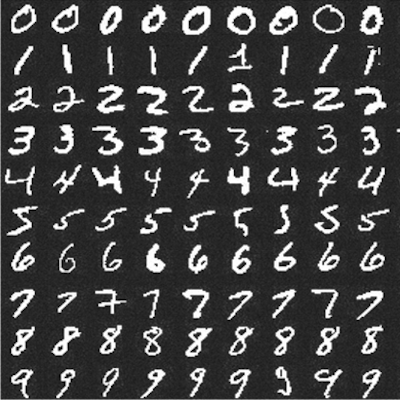

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from IPython.core.display import HTML 
from IPython.display import Image
from IPython.display import Image
Image(filename='HRD.png')

# <font color='green'>Introduction</font>

Handwritten Digit Recognition is the process of digitizing human handwritten digit images. It is a difficult task for the machine because handwritten digits are not perfect and can be made with a variety of flavors. In order to address this issue, we created HDR, which uses the image of a digit to identify the digit that is present in the image.

In this project, we developed a  <font color='blue'>Convolutional Neural Network (CNN)</font> model using <b>Tensorflow framework</b> to <b>Recognition of Handwritten Digit</b>.

A convolutional neural network (CNN, or ConvNet) is a Deep Learning algorithm that can take in an input image, assign learnable weights and biases to various objects in the image and be able to distinguish one from the other.

It is used to analyse visual imagery. Object detection, face recognition, robotics, video analysis, segmentation, pattern recognition, natural language processing, spam detection, topic categorization, regression analysis, speech recognition, image classification are some of the examples that can be done using Convolutional Neural Networking.

# <font color='green'>Approach</font>
We have used Sequential Keras model which has two pairs of **`Convolution2D`** and **`MaxPooling2D`** layers. The `MaxPooling` layer acts as a sort of downsampling using max values in a region instead of averaging. After that we will use Flatten layer to convert multidimensional parameters to vector.

The last layer has a Dense layer with **10 Softmax** outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is 0, the 1-st output represents a probability that the input digit is 1 and so on...



# <font color='green'>Result</font>
CNN performed well, providing validation accuracy and loss score of <font color='blue'>98.9%</font> and <font color='red'>4.5% </font>respectively.

# <font color='green'>Conclusion</font>
Convolutional neural network (CNN, or ConvNet) can be used to predict Handwritten Digits reasonably. We have successfully developed Handwritten digit recognition with Python, Tensorflow, and Machine Learning libraries. Handwritten Digits have been recognized by more than <font color='blue'>98.9%</font> validation accuracy.



##  <font color='SlateBlue'>2 | Import the dependencies and load the dataset </font>

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python

import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sn #statistical data visualization
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import math
import datetime
import platform #Platform module is used to retrieve as much possible information about the platform on which the program is being currently executed.



2023-06-17 02:31:06.648165: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-17 02:31:07.785767: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-17 02:31:07.789900: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-17 02:31:11.281721: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('./Dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

./Dataset/test.csv
./Dataset/train.csv


In [4]:
print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.9.12
Tensorflow version: 2.12.0
Keras version: 2.12.0


In [5]:
# Load the TensorBoard notebook extension.
# %reload_ext tensorboard
%load_ext tensorboard

In [6]:
# Clear any logs from previous runs.
!rm -rf ./.logs/

In [7]:
train = pd.read_csv('./Dataset/train.csv')
test = pd.read_csv('./Dataset/test.csv')

In [8]:
train

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
test

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <font color='SlateBlue'>3 | Data Overview </font>

The **MNIST dataset** contains 42,000 training images of handwritten digits from **zero to nine (10 different classes)** and 28,000 images for testing without the label identifier (for submission). These images are the grayscaled pixel value and are represented as a 28×28 matrix.

# 3.1 | Dimension of train and test data 

In [10]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
train.info(), train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(None, (42000, 785))

In [14]:
test.info(),  test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, (28000, 784))

In [15]:
# Extracting rows using Pandas .iloc[]

X = train.iloc[:, 1:785]
y = train.iloc[:, 0]

X_test = test.iloc[:, 0:784]

# 3.2 | Visualizing the data using TSNE 

TSNE - t-Distributed Stochastic Neighbor embedding. This is a dimensionality reduction algorithm that is designed to keep local structure in the high dimensional data set, but cares less about global structure. Here, we use it to go from the 784 pixel-dimension of the images to two dimensions. This makes plotting easier. The color scale is the original MNIST label and one can see that the separation of the labels is apparent.

In [16]:
# WARNING: running t-SNE on the full data set takes a while.
X_tsn = X/255

from sklearn.manifold import TSNE
tsne = TSNE()

tsne_res = tsne.fit_transform(X_tsn)

/home/sacchi/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/sacchi/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


KeyboardInterrupt: 

In [18]:
tsne_res.shape

(42000, 2)

In [19]:
tsne_res

array([[  7.70966 ,  56.0165  ],
       [ 17.033197, -49.59522 ],
       [ 39.246128,  40.532932],
       ...,
       [-13.289436,  27.34034 ],
       [-24.422695, -48.886265],
       [-34.455338,  10.552161]], dtype=float32)

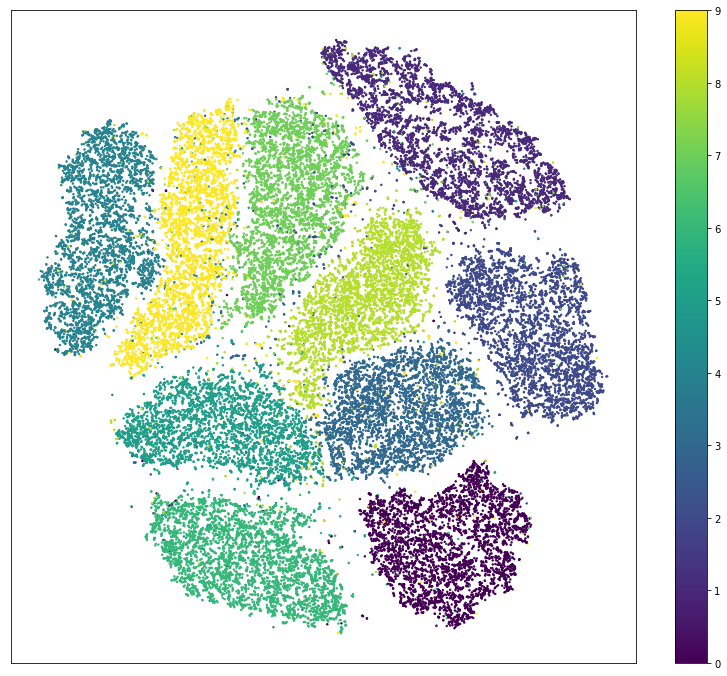

In [20]:
plt.figure(figsize=(14, 12))

# matplotlib.pyplot.scatter(x_axis_data, y_axis_data, s=None, c=None, marker=None, cmap=None, vmin=None, vmax=None, alpha=None, linewidths=None, edgecolors=None) 

plt.scatter(tsne_res[:,0], tsne_res[:,1], c=y, s=2)
plt.xticks([])
plt.yticks([])
plt.colorbar();

# 3.3 | Splitting data into training and validation dataset

We are dividing our dataset (X) into two parts.

1. The training dataset (80%) is used to fit our models
2. The Validation dataset (20%) is used to evaluate our models

train_test_split() method returns us the training data, its labels and also the validation data and its labels.

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size = 0.2,random_state = 1212)
# random_stateint, RandomState instance or None, default=None
#Controls the shuffling applied to the data before applying the split. 
#Pass an int for reproducible output across multiple function calls.

# 3.4 | Dimension of training and validation data

In [22]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_validation.shape)
print('y_validation:', y_validation.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


In [23]:
X_train

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
14176,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16218,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14355,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9215,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41937,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17509,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23990,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
34458,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# 3.5 | Converting training, testing, and validation data into array

In [24]:
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_validation.to_numpy().reshape(8400, 28, 28)
y_validation_re = y_validation.values
x_test_re = test.to_numpy().reshape(28000, 28, 28)

# 3.6 | Dimension of training, testing, and validation data after reshaping

Convert pexels list into 28*28 matrix as an image form.

In [25]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_validation_re.shape)
print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)

x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)


In [26]:
# Save image parameters to the constants that we will use later for data re-shaping and for model traning.
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH);
print('IMAGE_HEIGHT:', IMAGE_HEIGHT);
print('IMAGE_CHANNELS:', IMAGE_CHANNELS);

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


# 4 | Explore the data

Here is how each image in the dataset looks like. It is a 28x28 matrix of integers (from 0 to 255) and each integer represents a color of a pixel.

In [27]:
pd.DataFrame(x_train_re[0])

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,155,155,12,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,254,254,103,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,254,254,55,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,254,254,20,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,254,170,6,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,242,37,0,0,0,0,0,0,0,0


# 4.1 | Visualise how the digits were written 

This number matrix may be drawn as follows:

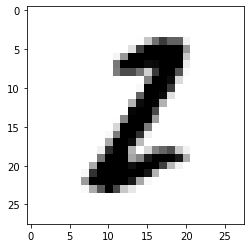

In [24]:
plt.imshow(x_train_re[0], cmap=plt.cm.binary)
plt.show()

Our first record of training data represents 2.

Let's print some more training examples to get the feeling of how the digits were written.

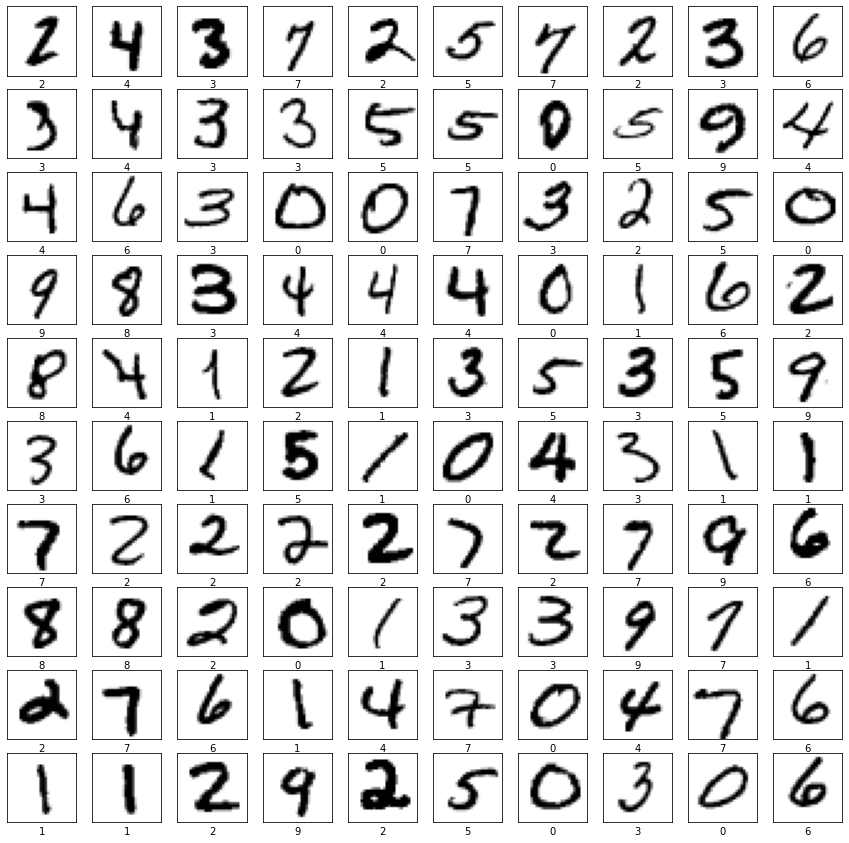

In [134]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15,15))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

# 4.2 | Reshaping train, test, and validation data 

In order to use convolution layers we need to reshape our data and add a color channel to it. As you've noticed currently every digit has a shape of (28, 28) which means that it is a 28x28 matrix of color values form 0 to 255. We need to reshape it to (28, 28, 1) shape so that each pixel potentially may have multiple channels (like Red, Green and Blue).

In [28]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_validation_with_chanels = x_validation_re.reshape(
    x_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [34]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


# 4.3 | Normalize train, test, and validation data 

Here we're just trying to normalize from values range of [0...255] to [0...1].

In [35]:
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

In [36]:
# Let's check just one row from the 0th image to see color chanel values after normalization.
x_train_normalized[0][10]

array([[0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.02352941],
       [0.99607843],
       [0.99607843],
       [0.99607843],
       [0.76862745],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ],
       [0.        ]])

# 5 | Build the CNN model to Classify Handwritten Digits 

A Convolutional Neural Network model generally consists of convolutional and pooling layers.

We are using Sequential Keras model which have two pairs of Convolution2D and MaxPooling2D layers. The MaxPooling layer acts as a sort of downsampling using max values in a region instead of averaging.

After that we will use Flatten layer to convert multidimensional parameters to vector.

The last layer will be a Dense layer with 10 Softmax outputs. The output represents the network guess. The 0-th output represents a probability that the input digit is 0, the 1-st output represents a probability that the input digit is 1 and so on...


<img title="a title" alt="Alt text" src="Conv2D-layer.png">
<img title="a title" alt="Alt text" src="MaxPooling2D-layer.png">
<img title="a title" alt="Alt text" src="Dense.png">
<img title="a title" alt="Alt text" src="Dropout-layer.png">
<img title="a title" alt="Alt text" src="Layer-weight-initializers.png">

* Arguments

    * scale: Scaling factor (positive float).
    * mode: One of "fan_in", "fan_out", "fan_avg".
    * distribution: Random distribution to use. One of "truncated_normal", "untruncated_normal" and "uniform".
    * seed: A Python integer. Used to make the behavior of the initializer deterministic. Note that a seeded initializer will produce the same random values across multiple calls.


In [58]:
# Sequential groups a linear stack of layers into a tf.keras.Model.
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Convolution2D(
    input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=3,
    filters=8,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Convolution2D(
    kernel_size=3,
    filters=16,
    strides=1,
    activation=tf.keras.activations.relu,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(
    units=128,
    activation=tf.keras.activations.relu
));

model.add(tf.keras.layers.Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=tf.keras.activations.softmax,
    kernel_initializer=tf.keras.initializers.VarianceScaling()
))

# 5.1 | Summary of the training model 

Here is our model summary so far.

In [59]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 26, 26, 8)         80        
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 13, 13, 8)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 11, 11, 16)        1168      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 400)               0         
                                                                 
 dense_6 (Dense)             (None, 128)              

# 5.2 | Visualization of the model 

In order to plot the model the graphviz should be installed.

A model summary that describes the various layers defined in the model.

In [60]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)
#Image(filename='Results.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


# 5.3 | Compile the model using keras.optimizers.Adam 

<img title="a title" alt="Alt text" src="Model-training-APIs.png">


In [61]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

# 5.4 | Train the model 
<img title="a title" alt="Alt text" src="Model-fit.png">


In [62]:
log_dir=".logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=10,
    validation_data=(x_validation_normalized, y_validation_re),
    callbacks=[tensorboard_callback]
)

print("The model has successfully trained")

Epoch 1/10
1050/1050 [==============================] - 13s 12ms/step - loss: 0.3042 - accuracy: 0.9062 - val_loss: 0.0976 - val_accuracy: 0.9708
Epoch 2/10
1050/1050 [==============================] - 10s 10ms/step - loss: 0.0995 - accuracy: 0.9689 - val_loss: 0.0668 - val_accuracy: 0.9799
Epoch 3/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0729 - accuracy: 0.9768 - val_loss: 0.0686 - val_accuracy: 0.9793
Epoch 4/10
1050/1050 [==============================] - 10s 10ms/step - loss: 0.0564 - accuracy: 0.9826 - val_loss: 0.0619 - val_accuracy: 0.9815
Epoch 5/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0486 - accuracy: 0.9843 - val_loss: 0.0462 - val_accuracy: 0.9851
Epoch 6/10
1050/1050 [==============================] - 10s 10ms/step - loss: 0.0384 - accuracy: 0.9875 - val_loss: 0.0478 - val_accuracy: 0.9843
Epoch 7/10
1050/1050 [==============================] - 10s 9ms/step - loss: 0.0343 - accuracy: 0.9895 - val_loss: 0.0532 - va

# 6 | Model evaluation 

# 6.1 | Loss plot curve for training and validation

Let's see how the loss function was changing during the training. We expect it to get smaller and smaller with every next epoch.

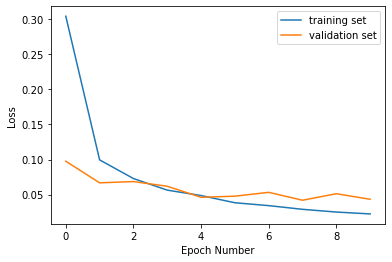

In [63]:
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

# 6.2 | Accuracy plot curve for training and validation

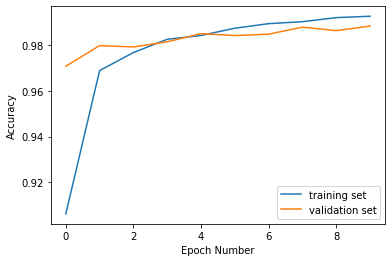

In [65]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

# 6.3 | Evaluation of the model accuracy

We need to compare the accuracy of our model on training set and on valiation set. We expect our model to perform similarly on both sets. If the performance on a validation set will be poor comparing to a training set it would be an indicator for us that the model is overfitted and we have a "high variance" issue.

# 6.3.2 | Performance of validation dataset 

In [66]:
%%capture
validation_loss, validation_accuracy = model.evaluate(x_validation_normalized, y_validation_re)

In [67]:
print('Validation loss: ', validation_loss)
print('Validation accuracy: ', validation_accuracy)

Validation loss:  0.043347593396902084
Validation accuracy:  0.9884523749351501


With a validation score of close to 99%, we proceed to use this model to predict for the test set.

# 6.3.3 | Save and load the model

We will save the entire model to a HDF5 file. The .h5 extension of the file indicates that the model shuold be saved in Keras format as HDF5 file.

In [46]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [47]:
loaded_model = tf.keras.models.load_model(model_name)

# 6.3.4 | Visualise validation predicted data on how the digits were written

To use the model that we've just trained for digits recognition we need to call predict() method.

In [49]:
predictions_one_hot = loaded_model.predict([x_validation_normalized])

263/263 [==============================] - 1s 4ms/step


In [51]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (8400, 10)


Each prediction consists of 10 probabilities (one for each number from 0 to 9). We need to pick the digit with the highest probability since this would be a digit that our model most confident with.

In [52]:
# Predictions in form of one-hot vectors (arrays of probabilities).
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,6.230010e-09,9.999987e-01,8.845473e-07,1.860290e-14,6.033394e-09,7.509883e-13,1.274887e-08,1.060635e-07,6.954539e-08,2.171697e-12
1,3.923828e-13,8.770197e-08,7.899100e-08,9.995323e-01,9.336035e-09,3.825559e-08,6.507291e-13,4.100994e-08,7.242240e-07,4.667208e-04
2,2.559905e-09,1.599754e-10,1.778519e-07,1.848398e-06,8.547248e-12,1.703708e-08,1.054488e-08,3.247291e-11,9.999971e-01,8.299995e-07
3,3.662315e-10,9.999972e-01,6.578468e-07,1.701888e-10,7.380850e-08,1.532540e-12,6.334965e-10,2.055727e-06,2.629711e-08,6.715656e-10
4,4.540559e-14,1.090825e-13,3.583288e-12,7.309210e-08,3.573504e-06,6.502405e-13,8.603145e-19,2.144817e-06,1.348547e-05,9.999806e-01
...,...,...,...,...,...,...,...,...,...,...
8395,1.164644e-16,2.441563e-16,4.097995e-11,1.904661e-19,9.999999e-01,1.250248e-16,5.811806e-15,3.705321e-20,7.096253e-17,4.406668e-17
8396,1.127153e-10,8.747968e-15,6.132787e-17,5.602555e-08,2.315082e-15,9.997580e-01,1.956613e-04,1.199643e-16,4.635321e-05,4.368178e-12
8397,9.182657e-13,5.076664e-12,1.298370e-12,3.100743e-14,1.051158e-08,8.459751e-13,1.889126e-18,9.999999e-01,1.747474e-13,6.262930e-11
8398,4.685047e-07,2.889051e-14,1.306917e-11,1.014177e-12,1.715266e-09,1.527153e-07,9.999993e-01,4.162248e-15,3.371048e-09,4.190227e-13


In [53]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions)

,0
0,1
1,3
2,8
3,1
4,9
...,...
8395,4
8396,5
8397,7
8398,6


So our model is predicting that the first example from the validation set is 1.

Let's print the first image from a validation set to see if model's prediction is correct.

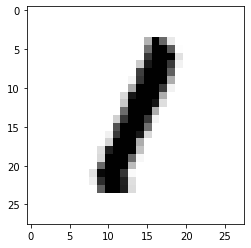

In [45]:
plt.imshow(x_validation_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

We see that our model made a correct prediction and it successfully recognized digit 1. Let's print some more test examples and correspondent predictions to see how model performs and where it does mistakes.

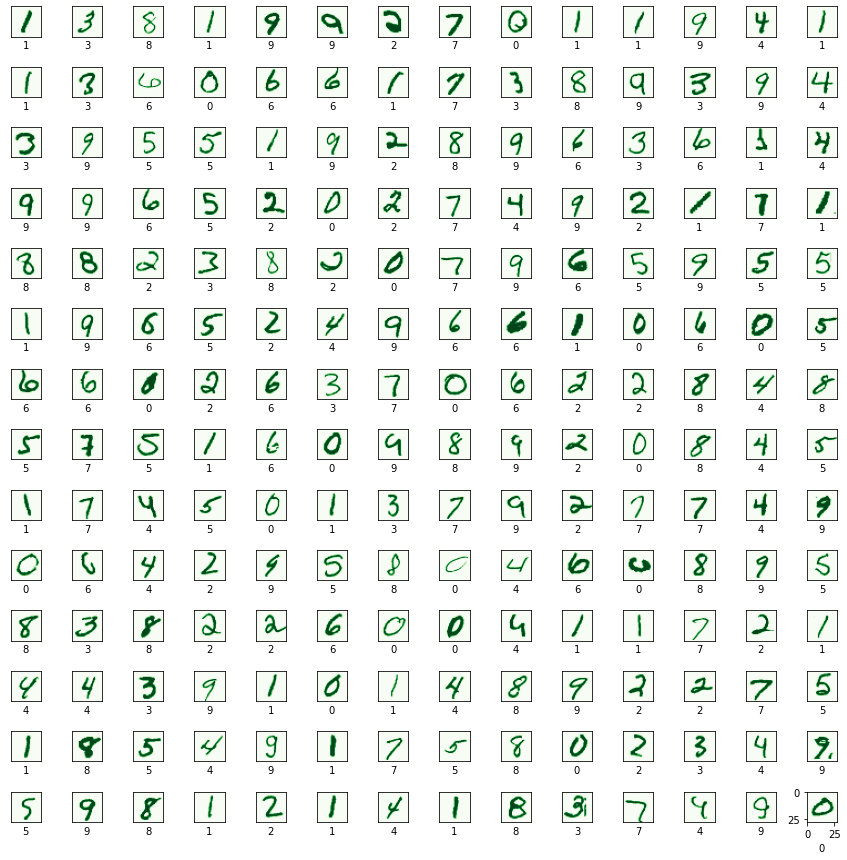

In [54]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation_re[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()

# 6.3.5 | Confusion matrix of validation dataset 

Confusion matrix shows what numbers are recognized well by the model and what numbers the model usually confuses to recognize correctly.

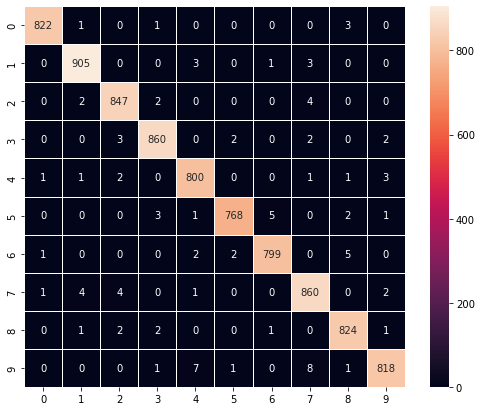

In [55]:
confusion_matrix = tf.math.confusion_matrix(y_validation_re, predictions)
f, ax = plt.subplots(figsize=(9, 7))
sn.heatmap(
    confusion_matrix,
    annot=True,
    linewidths=.5,
    fmt="d",
    square=True,
    ax=ax
)
plt.show()

# 7 | Model prediction on unseen dataset (test data) 

In [48]:
predictions_one_hot = loaded_model.predict([x_test_normalized])
print('predictions_one_hot:', predictions_one_hot.shape)

875/875 [==============================] - 3s 4ms/step
predictions_one_hot: (28000, 10)


Each prediction has ten probabilities (one for each number from 0 to 9). We need to choose the digit with the highest probability.

Predicted probabilities of all digits.

In [49]:
pd.DataFrame(predictions_one_hot)

,0,1,2,3,4,5,6,7,8,9
0,1.739957e-10,9.080412e-11,9.999999e-01,2.884919e-09,2.864003e-13,4.781751e-17,5.903056e-16,7.545971e-10,4.369619e-08,2.815153e-12
1,9.999852e-01,1.468756e-10,1.134081e-05,1.606797e-09,2.636776e-12,1.377386e-06,9.530164e-07,7.540584e-07,2.988635e-07,8.102517e-08
2,8.377919e-12,3.011487e-10,2.995567e-10,1.796052e-07,6.016421e-06,1.176566e-09,4.354399e-15,1.459108e-08,2.223825e-06,9.999915e-01
3,3.659463e-02,3.252694e-10,2.214349e-04,2.683262e-04,2.411141e-05,1.294797e-10,1.536501e-08,1.149382e-08,4.666001e-06,9.628868e-01
4,2.660557e-13,3.627047e-09,1.410507e-07,9.999998e-01,5.244598e-17,1.346346e-13,6.354055e-17,1.946695e-09,9.380376e-09,4.093823e-11
...,...,...,...,...,...,...,...,...,...,...
27995,1.634640e-19,9.301159e-18,6.946745e-17,8.306593e-12,6.036569e-08,4.365985e-12,4.007742e-25,3.004713e-10,6.232712e-10,9.999998e-01
27996,2.536227e-11,4.199736e-09,1.487777e-08,1.346204e-08,7.326642e-09,7.195203e-13,2.708088e-18,9.999904e-01,3.048703e-10,9.520663e-06
27997,9.241170e-27,2.115287e-16,6.049748e-18,9.999999e-01,2.933759e-26,8.398186e-18,7.426551e-31,3.590095e-16,9.091086e-15,2.869358e-15
27998,9.648704e-14,1.463188e-11,3.504144e-12,5.553837e-08,7.200076e-06,3.590893e-11,1.639437e-18,7.401484e-08,5.846005e-08,9.999927e-01


# 7.1 | Visualise test predicted data how the digits were written

Predicted digits with highest probabilites

Actual first digit from the test data

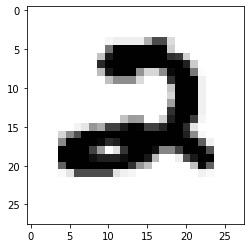

In [50]:
plt.imshow(x_test_normalized[0].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=plt.cm.binary)
plt.show()

# 8 | Submission 

In [51]:
test_pred = pd.DataFrame( loaded_model.predict([x_test_normalized]))
test_pred = pd.DataFrame(test_pred.idxmax(axis = 1))
test_pred.index.name = 'ImageId'
test_pred = test_pred.rename(columns = {0: 'Label'}).reset_index()
test_pred['ImageId'] = test_pred['ImageId'] + 1

test_pred.head()

875/875 [==============================] - 4s 4ms/step


,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3


In [52]:
test_pred.to_csv('submission.csv', index = False)